# 소상공인시장진흥공단 상가업소정보로 스타벅스, 이디야 위치 분석하기

* 이디야는 스타벅스 근처에 입점한다는 설이 있습니다. 과연 이디야와 스타벅스의 매장입지는 얼마나 차이가 날까요? 관련 기사를 읽고 구별로 이디야와 스타벅스의 매장을 기사와 유사하게 분석하고 시각화 해보면서 Python, Pandas, Numpy, Seaborn, Matplotlib 에 익숙해져 봅니다.

## 다루는 내용
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기

## 실습
* 텍스트 데이터 정제하기 -  대소문자로 섞여있는 상호명을 소문자로 변경하고 상호명 추출하기
* 텍스트 데이터에서 원하는 정보 추출하기 - 브랜드명 컬럼을 만들고 구별 매장 수 분석하기
* folium을 통해 지도에 분석한 내용을 표현하기


## 데이터셋
* https://www.data.go.kr/dataset/15012005/fileData.do
* 구별로 매장수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)
    * 이 링크에서도 다운로드가 가능합니다. https://drive.google.com/open?id=13j8-_XLdPe0pptsqu8-uyE-0Ym6V2jw5

## 관련기사
* [[비즈&빅데이터]스타벅스 '쏠림' vs 이디야 '분산'](http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015)

In [2]:
# 파일의 목록 확인하기
%ls C:\Users\SWH\Desktop\Python\data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8E32-2172

 C:\Users\SWH\Desktop\Python\data 디렉터리

2020-03-04  오후 07:46    <DIR>          .
2020-03-04  오후 07:46    <DIR>          ..
2020-03-04  오후 06:03               958 covid19_dates.csv
2020-03-04  오후 07:45               303 covid19_korea.csv
2020-03-02  오후 10:09               326 lethal.csv
2020-03-02  오후 10:07               329 Lethality.csv
2020-03-04  오후 01:29           214,003 patient.csv
2020-03-04  오후 01:29             4,514 route.csv
2020-02-27  오후 01:52            57,732 seoul_municipalities_geo_simple.json
2020-02-27  오후 02:00       304,982,279 store_201906_01.csv
2020-03-04  오후 01:29             1,995 time.csv
2020-03-02  오후 08:38               798 사망자정보.csv
2020-03-01  오후 09:19            11,113 사망자정보.xlsx
2020-02-20  오후 04:08             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2020-02-20  오후 04:08           149,663 주택도시보증공사_전국 평균 분양가격(2019년 8월)_20190917.csv
              13개 파일         305,426,176 바이트
               2개 디렉터리  99,9

In [3]:
# warning 메시지 제거
import warnings
warnings.filterwarnings('ignore')

# 필요한 라이브러리 불러오기

In [4]:
# 판다스, 넘파이, 씨본을 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

# 구버전의 주피터 노트북에서 그래프가 보이는 설정하기
%matplotlib inline

# 시각화를 위한 한글 폰트 설정하기

In [6]:
import matplotlib.pyplot as plt
# 맑은 고딕
plt.rc('font', family='Malgun Gothic')
# 폰트깨지는 현상 없애기
plt.rc('axes', unicode_minus=False)

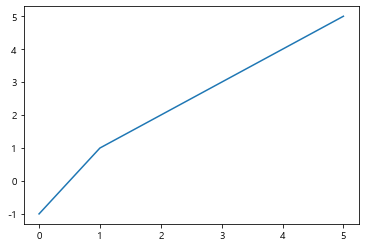

In [7]:
# 설정 후 -1값이 깨지지 않음
pd.Series([-1, 1, 2, 3, 4, 5]).plot()

## 데이터 불러오기
* 데이터 다운로드 위치 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다.
* 구글드라이브에서 받기 : https://drive.google.com/open?id=1xvJs9ZxUHoBBAUXq1IWEaRXgcop8KjrT

In [10]:
# 파일 불러오기
df_store = pd.read_csv('C:/Users/SWH/Desktop/Python/data/store_201906_01.csv')

# 데이터 크기 보기

In [11]:
df_store.shape

(565016, 39)

# info 보기

In [13]:
# info를 사용하면 데이터의 전체적인 정보를 볼 수 있다.
# 데이터의 사이즈, 타입, 메모리 사용량 등
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565016 entries, 0 to 565015
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     565016 non-null  int64  
 1   상호명        565015 non-null  object 
 2   지점명        75524 non-null   object 
 3   상권업종대분류코드  565016 non-null  object 
 4   상권업종대분류명   565016 non-null  object 
 5   상권업종중분류코드  565016 non-null  object 
 6   상권업종중분류명   565016 non-null  object 
 7   상권업종소분류코드  565016 non-null  object 
 8   상권업종소분류명   565016 non-null  object 
 9   표준산업분류코드   532064 non-null  object 
 10  표준산업분류명    532064 non-null  object 
 11  시도코드       565016 non-null  int64  
 12  시도명        565016 non-null  object 
 13  시군구코드      565016 non-null  int64  
 14  시군구명       565016 non-null  object 
 15  행정동코드      565016 non-null  int64  
 16  행정동명       565016 non-null  object 
 17  법정동코드      565016 non-null  int64  
 18  법정동명       565016 non-null  object 
 19  지번코드       565016 non-n

# 결측치 보기

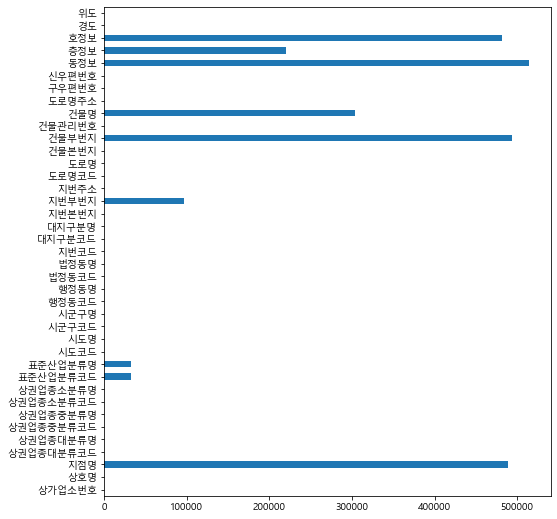

In [14]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있다.
df_store.isnull().sum().plot.barh(figsize=(8,9))

# 사용하지 않는 컬럼 제거하기

In [15]:
# 사용할 컬럼만 따로 불러와서 작업을 할 수도 있지만 사용하지 않는 컬럼을 제거하는 방법도 있다.
# 판다스에서는 drop 기능을 사용해서 사용하지 않는 컬럼을 삭제할 수 있다.
# 삭제할 컬럼을 drop_columns 라는 변수에 리스트 형태로 담아보도록 한다.

null_cols = df_store.isnull().sum().sort_values(ascending=False).head(9)
drop_columns = null_cols.index.to_list()
drop_columns

['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류명', '표준산업분류코드']

In [16]:
# drop를 사용해 사용하지 않는 컬럼을 제거
# 컬럼을 제거하기 전과 제거 후에 shape 를 통해 컬럼의 수가 달라졌는지 확인
print(df_store.shape)
# axis가 0이면 행을 기준으로함. 1이면 열을 기준으로함.
df_store = df_store.drop(drop_columns, axis=1)
print(df_store.shape)

(565016, 39)
(565016, 30)


In [17]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565016 entries, 0 to 565015
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     565016 non-null  int64  
 1   상호명        565015 non-null  object 
 2   상권업종대분류코드  565016 non-null  object 
 3   상권업종대분류명   565016 non-null  object 
 4   상권업종중분류코드  565016 non-null  object 
 5   상권업종중분류명   565016 non-null  object 
 6   상권업종소분류코드  565016 non-null  object 
 7   상권업종소분류명   565016 non-null  object 
 8   시도코드       565016 non-null  int64  
 9   시도명        565016 non-null  object 
 10  시군구코드      565016 non-null  int64  
 11  시군구명       565016 non-null  object 
 12  행정동코드      565016 non-null  int64  
 13  행정동명       565016 non-null  object 
 14  법정동코드      565016 non-null  int64  
 15  법정동명       565016 non-null  object 
 16  지번코드       565016 non-null  int64  
 17  대지구분코드     565016 non-null  int64  
 18  대지구분명      565016 non-null  object 
 19  지번본번지      565016 non-n

# 일부 컬럼만 보기

In [19]:
# '상권업종대분류명'만 가지고 오기
df_store['상권업종대분류명']

0            음식
1            음식
2            음식
3            음식
4         생활서비스
          ...  
565011       음식
565012       음식
565013    학문/교육
565014       소매
565015       소매
Name: 상권업종대분류명, Length: 565016, dtype: object

In [21]:
# '상권업종소분류명'만 가지고 오기
df_store['상권업종소분류명']

0         커피전문점/카페/다방
1               호프/맥주
2               토스트전문
3               호프/맥주
4          사우나/증기탕/온천
             ...     
565011       중국음식/중국집
565012       중국음식/중국집
565013            독서실
565014          전화기판매
565015          전화기판매
Name: 상권업종소분류명, Length: 565016, dtype: object

In [22]:
# '상권업종대분류명', '상권업종소분류명' 두 개의 컬럼을 가져오기
# 2개 이상의 컬럼을 가져올 때는 리스트 형태의 데이터로 묶어서 사용해야 한다.
df_store[['상권업종대분류명','상권업종소분류명']].head(2)

,상권업종대분류명,상권업종소분류명
0,음식,커피전문점/카페/다방
1,음식,호프/맥주


In [24]:
# columns를 사용하면 데이터프레임의 컬럼명만 가져온다.
df_store.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [25]:
# 컬럼이 많은 편이다.
# 모든 컬럼을 다 사용하지 않기 때문에 일부 컬럼만 가져온다.
df_columns = ['상가업소번호', '상호명', '상권업종대분류명', 
       '상권업종중분류명',  '상권업종소분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동명', '법정동명', '지번코드',
       '대지구분명', '지번본번지','지번주소', '도로명주소', 
       '구우편번호', '신우편번호', '경도', '위도']
df = df_store[df_columns].copy()
df.shape

(565016, 20)

# 일부 텍스트가 들어가는 데이터만 가져오기

In [26]:
# str.contains를 사용하면 특정 단어가 포함된 데이터를 가져온다.
# 여기에서는 '상권업종소분류명'으로 '커피'가 들어가는 단어만 가져온다.
df_coffee = df[df['상권업종소분류명'].str.contains('커피')]
df_coffee.head(2)

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도코드,시도명,시군구코드,시군구명,행정동명,법정동명,지번코드,대지구분명,지번본번지,지번주소,도로명주소,구우편번호,신우편번호,경도,위도
0,19911397,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,11,서울특별시,11680,강남구,역삼1동,역삼동,1168010100206960042,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길 6,135080,6149.0,127.047883,37.505675
10,20020124,스완카페트,음식,커피점/카페,커피전문점/카페/다방,11,서울특별시,11560,영등포구,대림3동,대림동,1156013300206040056,대지,604,서울특별시 영등포구 대림동 604-56,서울특별시 영등포구 도신로10가길 11-1,150070,7379.0,126.897710,37.503693


In [27]:
df_coffee['상호명']

0         커피빈코리아선릉로93길점
10                스완카페트
16                   왕실
20                  커피빈
22         고려대학교교육관쎄리오점
              ...      
564967           투썸플레이스
564968            놀러오시개
564969             뉴욕보틀
564970        블루빈로스터스커피
564971           심리카페멘토
Name: 상호명, Length: 23103, dtype: object

In [28]:
# 상호명으로 봤을 때 커피점의 수를 출력해본다.
# unique를 사용하면 중복을 제거한 상호명을 가져온다.
# 그리고 shape로 갯수를 출력해본다.
df_coffee['상호명'].unique().shape

(15205,)

In [29]:
# nunique 를 사용하면 중복을 제거한 상호명의 갯수를 세어준다.

df_coffee['상호명'].nunique()

15205

In [30]:
# 스타벅스라는 브랜드명을 어떻게 추출해야 할지 알아보기 위해 중복을 제거한 스타벅스의 상호명만 가져온다.
df_coffee.loc[df_coffee['상호명'].str.contains('스타벅스|STARBUCKS'),'상호명']

1219                스타벅스
1946           스타벅스종로3가점
2840                스타벅스
14939     스타벅스커피여의도IFC1F
14951               스타벅스
               ...      
562067              스타벅스
562068              스타벅스
562381              스타벅스
563162              스타벅스
564740              스타벅스
Name: 상호명, Length: 602, dtype: object

## 시도별 데이터 보기
* 시도와 구군 데이터가 있습니다. 어느 시도의 데이터가 있는지 봅니다.

In [32]:
# 시도에 결측치가 있는지 확인
df['시도명'].isnull().sum()

0

In [33]:
# 지난 데이터와 마찬가지로 서울과 부산만 있다.
# 다른 지역을 참고하고 싶다면 다운로드 받은 공공데이터와 같은 폴더에 있는 다른 파일을 참고
df['시도명'].value_counts()

서울특별시    401071
부산광역시    163945
Name: 시도명, dtype: int64

In [34]:
# 시군구명에서 unique 한 값을 보기

df['시군구명'].unique()

array(['강남구', '금천구', '사상구', '송파구', '광진구', '강서구', '중구', '영등포구', '서대문구',
       '동대문구', '서초구', '성북구', '구로구', '노원구', '동래구', '부산진구', '동작구', '동구',
       '수영구', '성동구', '영도구', '관악구', '강동구', '종로구', '양천구', '해운대구', '금정구',
       '연제구', '은평구', '기장군', '강북구', '사하구', '마포구', '중랑구', '서구', '도봉구', '북구',
       '남구', '용산구'], dtype=object)

In [35]:
# coffee 라고 만들어 준 데이터 프레임을 통해 "상권업종중분류명"을 value_counts()로 요약해본다.

df_coffee['상권업종중분류명'].value_counts()

커피점/카페    23103
Name: 상권업종중분류명, dtype: int64

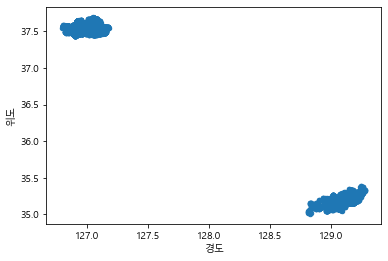

In [36]:
# 경도와 위도가 있다. 데이터를 그려본다.

df_coffee[['경도','위도']].plot.scatter(x='경도',y='위도')

## 서울만 따로 보기

In [37]:
# 시도명이 서울로 시작하는 데이터만 본다.
# 또, df_seoul 이라는 변수에 결과를 저장한다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장함
df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.shape

(401071, 20)

In [38]:
# 서울 데이터의 결측치를 본다.
# 위와 동일하게 isnull()과 sum()을 사용해서 결측치의 수를 더할 수 있다.
df_seoul.isnull().sum()

상가업소번호      0
상호명         0
상권업종대분류명    0
상권업종중분류명    0
상권업종소분류명    0
시도코드        0
시도명         0
시군구코드       0
시군구명        0
행정동명        0
법정동명        0
지번코드        0
대지구분명       0
지번본번지       0
지번주소        0
도로명주소       0
구우편번호       0
신우편번호       2
경도          0
위도          0
dtype: int64

In [39]:
# 서울에 있는 '상권업종대분류명'을 그룹화 하여 갯수를 세어본다.
df_seoul['상권업종대분류명'].value_counts()

음식          131687
소매          124782
생활서비스        64344
학문/교육        31247
의료           18826
부동산          15430
관광/여가/오락     11578
숙박            3047
스포츠            130
Name: 상권업종대분류명, dtype: int64

In [40]:
# describe 를 하게 되면 요약된 데이터 정보를 볼 수 있다.
df_seoul.describe()

,상가업소번호,시도코드,시군구코드,지번코드,지번본번지,구우편번호,신우편번호,경도,위도
count,4.010710e+05,401071.0,401071.000000,4.010710e+05,401071.000000,401071.000000,401069.000000,401071.000000,401071.000000
mean,2.052282e+07,11.0,11442.252968,1.144238e+18,409.462442,136291.790244,5175.680167,126.996983,37.544965
std,5.322704e+06,0.0,200.674978,2.006699e+16,412.802944,14225.510291,2099.935420,0.080574,0.048108
min,2.890524e+06,11.0,11110.000000,1.111010e+18,1.000000,100011.000000,1000.000000,126.768169,37.434081
25%,1.601555e+07,11.0,11230.000000,1.123071e+18,89.000000,131200.000000,3414.000000,126.928061,37.505431
50%,2.237100e+07,11.0,11470.000000,1.147010e+18,289.000000,136801.000000,5242.000000,127.012732,37.541162
75%,2.493524e+07,11.0,11650.000000,1.165010e+18,635.000000,143848.000000,6716.000000,127.057331,37.571921
max,2.852486e+07,11.0,11740.000000,1.174070e+18,9994.000000,158885.000000,8866.000000,127.182588,37.692398


In [42]:
# 위도와 경도만 describe 를 통해 요약해본다.
df_seoul[['위도','경도']].describe()

,위도,경도
count,401071.000000,401071.000000
mean,37.544965,126.996983
std,0.048108,0.080574
min,37.434081,126.768169
25%,37.505431,126.928061
50%,37.541162,127.012732
75%,37.571921,127.057331
max,37.692398,127.182588


## 분류별 countplot 그리기

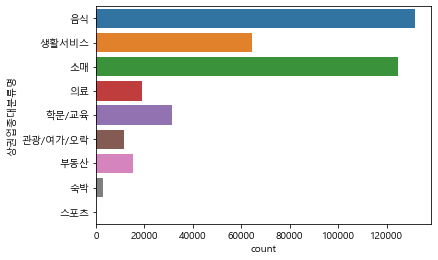

In [43]:
# 상권업종대분류명 으로 seaborn 의 countplot 을 사용해 시각화를 한다.
# seaborn 의 countplot은 같은 데이터를 그룹화하여 더해준 값을 그래프로 표현한다.
sns.countplot(data=df_seoul, y='상권업종대분류명')

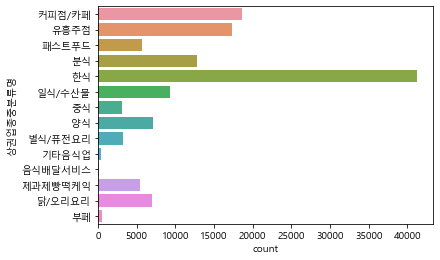

In [46]:
# countplot 을 그리면 해당 카테고리에 해당되는 데이터의 수를 카운트해서 시각화한다.
# "상권업종대분류명"을 시각화하면 "음식" 업종이 가장 많다.

df_food = df_seoul[df_seoul['상권업종대분류명'] == '음식']

sns.countplot(data=df_food, y='상권업종중분류명')

In [47]:
# 특정 업종 "패스트푸드" 만 보도록 한다.

df_fast_food = df_food.loc[df_food['상권업종중분류명'] == '패스트푸드']
df_fast_food.head(2)

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도코드,시도명,시군구코드,시군구명,행정동명,법정동명,지번코드,대지구분명,지번본번지,지번주소,도로명주소,구우편번호,신우편번호,경도,위도
5,19964615,석봉토스트,음식,패스트푸드,토스트전문,11,서울특별시,11215,광진구,구의2동,구의동,1121510300200770047,대지,77,서울특별시 광진구 구의동 77-47,서울특별시 광진구 자양로39길 20,143200,4992.0,127.088387,37.549245
7,19977290,피자마루,음식,패스트푸드,피자전문,11,서울특별시,11140,중구,약수동,신당동,1114016200203720095,대지,372,서울특별시 중구 신당동 372-95,서울특별시 중구 동호로7길 37,100450,4596.0,127.010861,37.552153


In [48]:
# 해당 데이터에서 특정 컬럼만 가져오고 싶은데 컬럼명이 생각나지 않는다면 컬럼명만 가져와본다.

df_fast_food.columns

Index(['상가업소번호', '상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도코드', '시도명',
       '시군구코드', '시군구명', '행정동명', '법정동명', '지번코드', '대지구분명', '지번본번지', '지번주소',
       '도로명주소', '구우편번호', '신우편번호', '경도', '위도'],
      dtype='object')

In [49]:
# 상호명을 unique 로 출력해본다.

df_fast_food['상호명'].unique()

array(['석봉토스트', '피자마루', '솔로몬피자', ..., '몬스터피자&펍', '피자뽀끼', '피자레볼루션'],
      dtype=object)